In [13]:
import numpy as np
import pandas as pd

In [14]:
import pandas as pd

# 'latin-1' encoding specify kiya hai taaki Unicode error na aaye.
df = pd.read_csv("spam.csv", encoding="latin-1")

df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [15]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3682,ham,When did i use soc... I use it only at home......,NaN,NaN,NaN
5273,ham,Its too late:)but its k.wish you the same.,NaN,NaN,NaN
2685,spam,URGENT! We are trying to contact U. Todays dra...,NaN,NaN,NaN
2976,ham,"Ok omw now, you at castor?",NaN,NaN,NaN
4905,ham,Will you come online today night,NaN,NaN,NaN


In [16]:
df.shape

(5572, 5)

In [ ]:
# data cleaning
# EDA 
# text preprocessing
# model training
# evaluation
# improvement
# website
# deploy

## 1. Data Cleaning

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [19]:
# drop last 3 col.
df.drop(columns=['Unnamed: 2', 'Unnamed: 3' , 'Unnamed: 4'], inplace=True)

In [20]:
df.sample(5)

,v1,v2
4934,ham,"Hey babe, how's it going ? Did you ever figure..."
3441,spam,Save money on wedding lingerie at www.bridal.p...
4197,spam,Want to funk up ur fone with a weekly new tone...
5552,ham,Have a safe trip to Nigeria. Wish you happines...
85,ham,"I call you later, don't have network. If urgnt..."


In [21]:
# renaming the com.
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
4404,ham,Dun need to use dial up juz open da browser n ...
39,ham,Hello! How's you and how did saturday go? I wa...
4181,spam,Urgent! Please call 0906346330. Your ABTA comp...
2466,ham,He is world famamus....
3666,ham,Honey ? Sweetheart ? Darling ? Sexy buns ? Sug...


In [22]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [23]:
df['target'] = encoder.fit_transform(df['target'])

In [24]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [25]:
# missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [27]:
# duplicate value
df.duplicated().sum()

np.int64(403)

In [29]:
# remove duplicates
df = df.drop_duplicates(keep='first')

In [31]:
df.shape

(5169, 2)

 ## 2. EDA
 

In [32]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [33]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

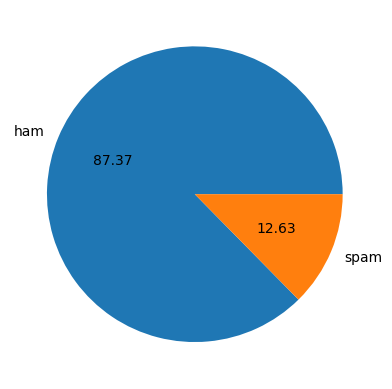

In [34]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [35]:
# data is imbalanced

In [36]:
import nltk

In [37]:
!pip install nltk

In [38]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [39]:
df[text].apply(len)

NameError: name 'text' is not defined

In [40]:
df['num_characters'] = df['text'].apply(len)

In [41]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [42]:
# number of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - 'C:\\Users\\ASUS/nltk_data'
    - 'C:\\Users\\ASUS\\anaconda3\\nltk_data'
    - 'C:\\Users\\ASUS\\anaconda3\\share\\nltk_data'
    - 'C:\\Users\\ASUS\\anaconda3\\lib\\nltk_data'
    - 'C:\\Users\\ASUS\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


In [43]:
# number of words
df['text'].apply(lambda x:nltk.word_tokenize(x))

LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - 'C:\\Users\\ASUS/nltk_data'
    - 'C:\\Users\\ASUS\\anaconda3\\nltk_data'
    - 'C:\\Users\\ASUS\\anaconda3\\share\\nltk_data'
    - 'C:\\Users\\ASUS\\anaconda3\\lib\\nltk_data'
    - 'C:\\Users\\ASUS\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


In [44]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

In [45]:
# number of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [46]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [47]:
# number of sentences
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [48]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [49]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [51]:
# ham msg
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [52]:
# spam msg
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [53]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

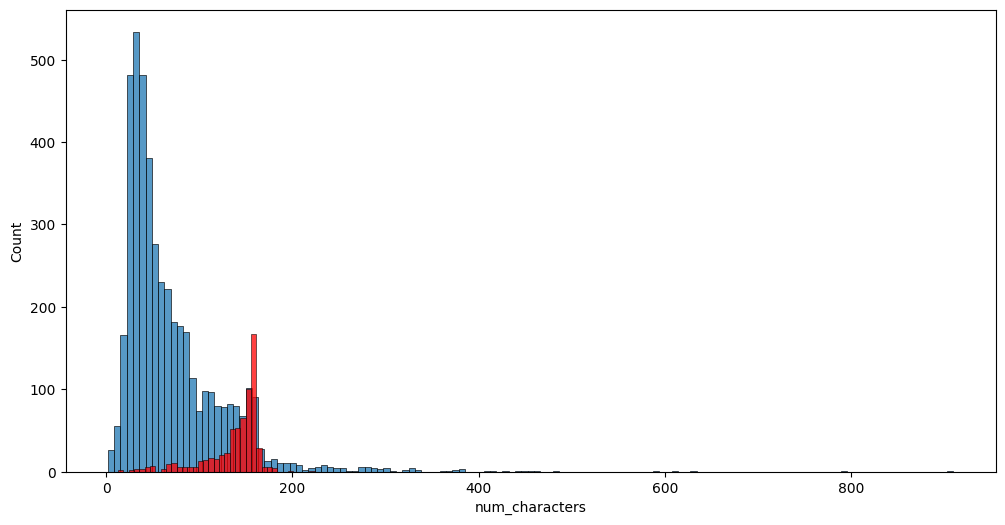

In [56]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

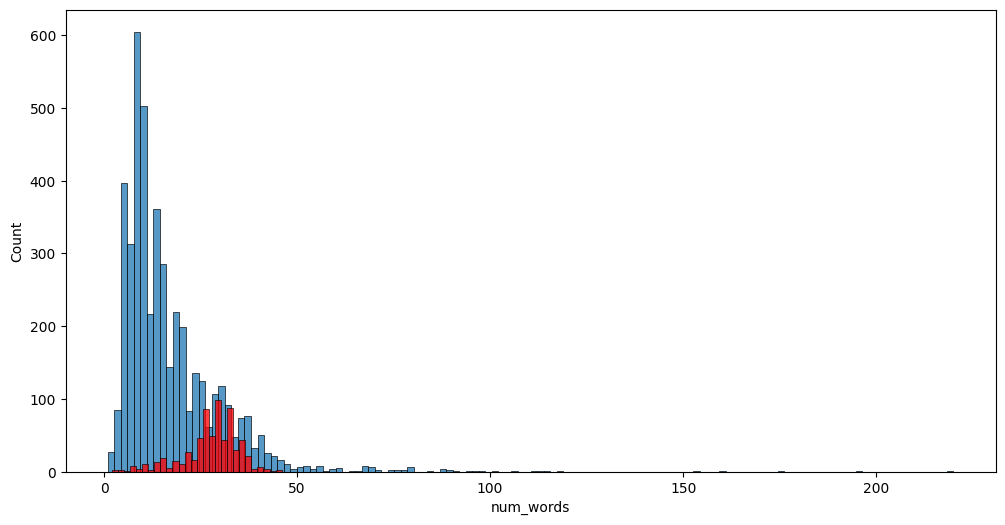

In [57]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

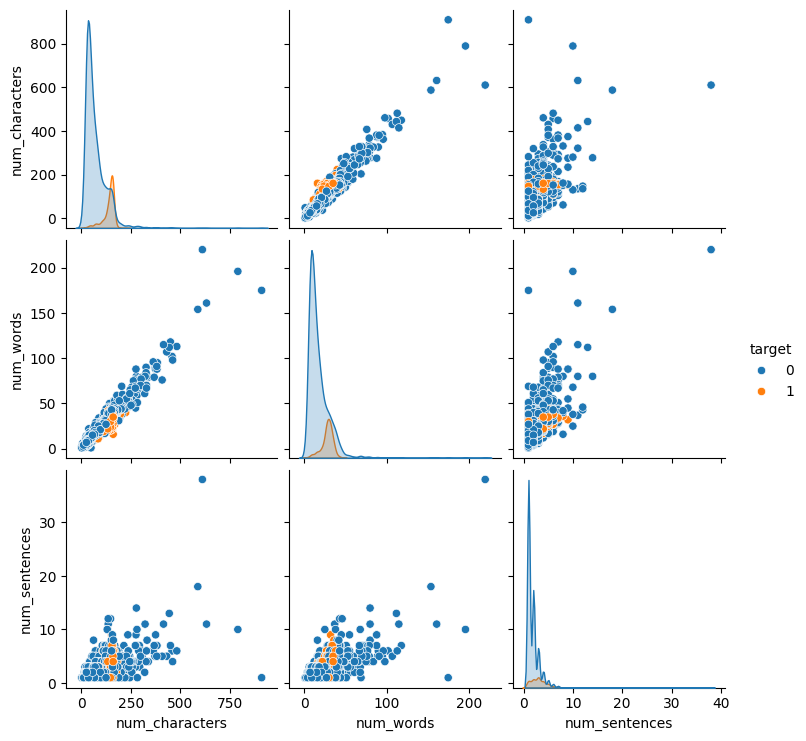

In [58]:
sns.pairplot(df,hue='target')

In [59]:
sns.heatmap(df.corr(),annot=True)

ValueError: could not convert string to float: 'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

<Axes: >

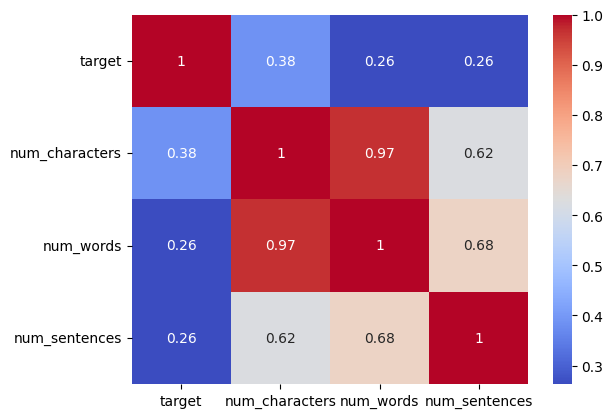

In [60]:
import seaborn as sns

# select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# correlation heatmap
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")


## 3. Data Preprocessing
 - lower case
 - tokenization
 - removing spcl. char.
 - removing stop words(in,is,of,the) and punctuations
 - stemming(dance,dancing,danced = converted into dance)

In [64]:
import nltk
from nltk.corpus import stopwords
import string

# Make sure stopwords are downloaded
nltk.download('stopwords')

def transform_text(text):
    y = []
    for i in text.split():   # you probably want to split the text first
        if i.lower() not in stopwords.words('english') and i not in string.punctuation:
            y.append(i.lower())
    return " ".join(y)
    

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [65]:
transform_text('i loved the yt lectures on ml')

'loved yt lectures ml'

In [67]:
df['transformed_text']=df['text'].apply(transform_text)

In [68]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,"go jurong point, crazy.. available bugis n gre..."
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar... joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entry 2 wkly comp win fa cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say early hor... u c already say...
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,"nah think goes usf, lives around though"


In [70]:
!pip install wordcloud



In [77]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [78]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

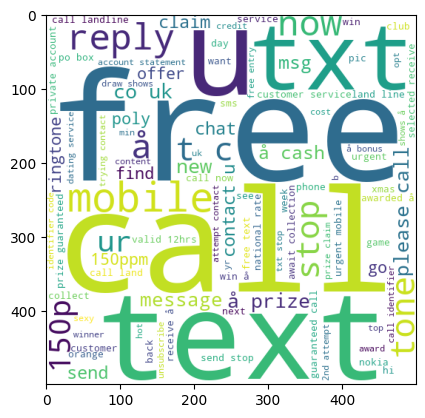

In [79]:
plt.imshow(spam_wc)

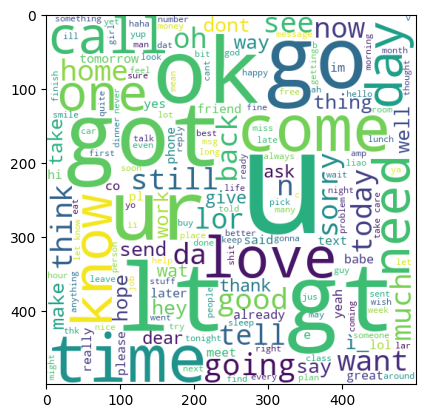

In [80]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))
plt.imshow(ham_wc)

In [82]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [83]:
len(spam_corpus)

11061

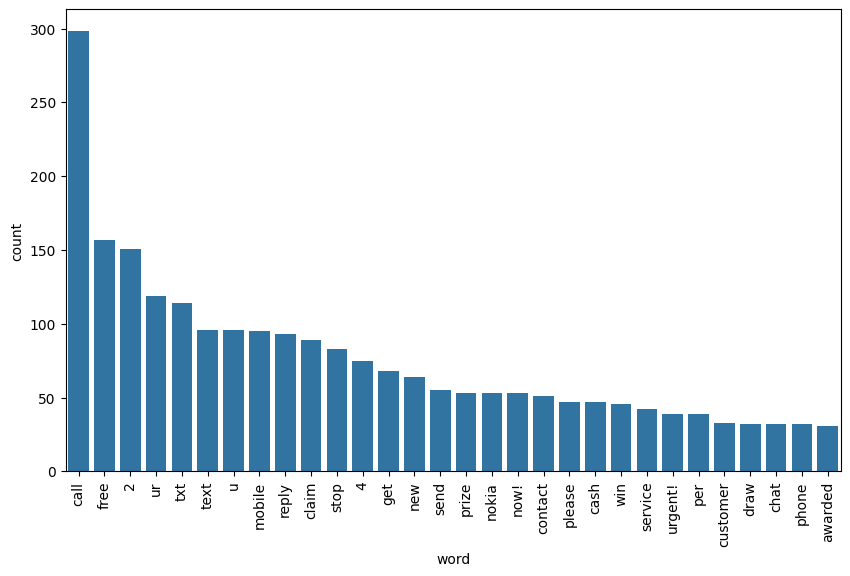

In [87]:
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# get top 30 words
most_common_df = pd.DataFrame(Counter(spam_corpus).most_common(30))

# rename columns for clarity
most_common_df.columns = ['word', 'count']

# plot
plt.figure(figsize=(10,6))
sns.barplot(x='word', y='count', data=most_common_df)
plt.xticks(rotation='vertical')
plt.show()


In [92]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [93]:
len(ham_corpus)


37690

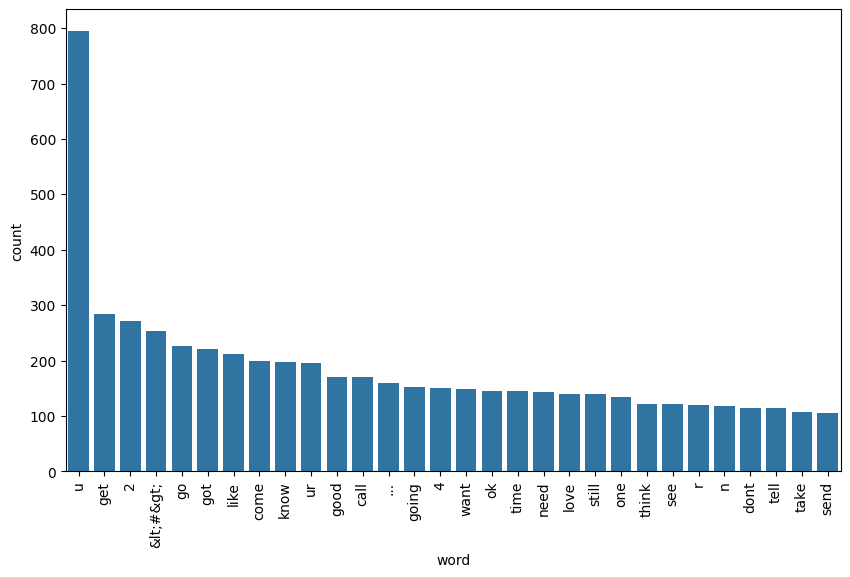

In [94]:
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# get top 30 words
most_common_df = pd.DataFrame(Counter(ham_corpus).most_common(30))

# rename columns for clarity
most_common_df.columns = ['word', 'count']

# plot
plt.figure(figsize=(10,6))
sns.barplot(x='word', y='count', data=most_common_df)
plt.xticks(rotation='vertical')
plt.show()

In [95]:
# text vectorization
# using bag of words
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,"go jurong point, crazy.. available bugis n gre..."
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar... joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entry 2 wkly comp win fa cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say early hor... u c already say...
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,"nah think goes usf, lives around though"


## 4. Model building


In [151]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [152]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [153]:
X.shape

(5169, 3000)

In [154]:
y = df['target'].values

In [155]:
y

array([0, 0, 1, ..., 0, 0, 0], shape=(5169,))

In [156]:
from sklearn.model_selection import train_test_split

In [157]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=2)

In [158]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [159]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [160]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8994197292069632
[[811  85]
 [ 19 119]]
0.5833333333333334


In [161]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9777562862669246
[[895   1]
 [ 22 116]]
0.9914529914529915


In [162]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9864603481624759
[[896   0]
 [ 14 124]]
1.0


In [163]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier   # fixed here
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier


In [164]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50, random_state=2)

In [165]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT': gbdt,
    'xgb': xgb
}

In [166]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [167]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.97678916827853, 0.9672131147540983)

In [168]:
accuracy_scores = []
precision_scores = []

# Loop through each classifier, train it, and store its performance
for name, clf in clfs.items():
    current_accuracy, current_precision = train_classifier(clf, X_train, y_train, X_test, y_test)
    
    print(f"For {name}")
    print(f"Accuracy - {current_accuracy}")
    print(f"Precision - {current_precision}")
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For SVC
Accuracy - 0.97678916827853
Precision - 0.9672131147540983
For KN
Accuracy - 0.9032882011605415
Precision - 1.0
For NB
Accuracy - 0.9777562862669246
Precision - 0.9914529914529915
For DT
Accuracy - 0.9448742746615088
Precision - 0.8857142857142857
For LR
Accuracy - 0.9526112185686654
Precision - 0.9494949494949495
For RF
Accuracy - 0.9738878143133463
Precision - 0.9663865546218487
For AdaBoost
Accuracy - 0.9332688588007737
Precision - 0.9058823529411765
For BgC
Accuracy - 0.9613152804642167
Precision - 0.8769230769230769
For ETC
Accuracy - 0.9825918762088974
Precision - 0.9761904761904762
For GBDT
Accuracy - 0.9477756286266924
Precision - 0.9375
For xgb
Accuracy - 0.9748549323017408
Precision - 0.9666666666666667


In [169]:
performance_df = pd.DataFrame({
    'Algorithm': clfs.keys(),
    'Accuracy': accuracy_scores,
    'Precision': precision_scores
}).sort_values('Precision', ascending=False)

In [170]:
print("\nPerformance DataFrame:")
print(performance_df)



Performance DataFrame:
   Algorithm  Accuracy  Precision
1         KN  0.903288   1.000000
2         NB  0.977756   0.991453
8        ETC  0.982592   0.976190
0        SVC  0.976789   0.967213
10       xgb  0.974855   0.966667
5         RF  0.973888   0.966387
4         LR  0.952611   0.949495
9       GBDT  0.947776   0.937500
6   AdaBoost  0.933269   0.905882
3         DT  0.944874   0.885714
7        BgC  0.961315   0.876923


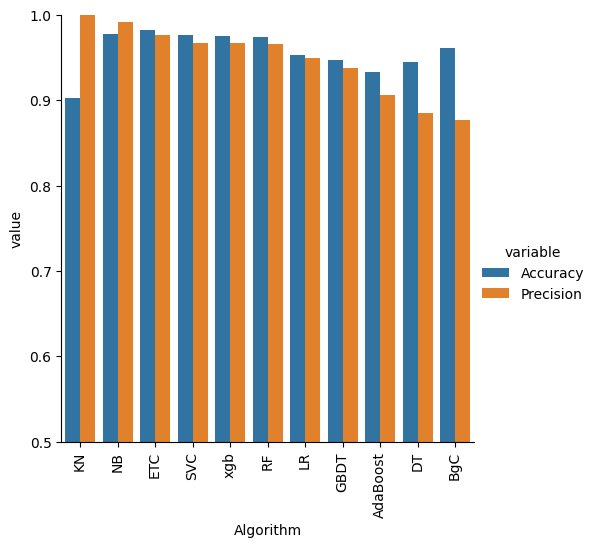

In [173]:
performance_df1 = pd.melt(performance_df, id_vars="Algorithm", var_name="variable", value_name="value")

sns.catplot(x='Algorithm', y='value', 
            hue='variable', data=performance_df1, kind='bar', height=5)
plt.ylim(0.5, 1.0)
plt.xticks(rotation='vertical')
plt.show()


In [176]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))